In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_young_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55          8.3524 ( 8.0005,  8.7455) ( 7.9900,  8.7321)  0.7422 (Jnode 106)\n',
 't_n56          8.2821 ( 7.9147,  8.6839) ( 7.9084,  8.6744)  0.7660 (Jnode 105)\n',
 't_n57          7.9518 ( 7.5975,  8.3309) ( 7.5822,  8.3122)  0.7301 (Jnode 104)\n',
 't_n58          7.1647 ( 6.8099,  7.5310) ( 6.8067,  7.5257)  0.7190 (Jnode 103)\n',
 't_n59          6.9963 ( 6.6361,  7.3615) ( 6.6321,  7.3552)  0.7232 (Jnode 102)\n',
 't_n60          6.7483 ( 6.3697,  7.1261) ( 6.3695,  7.1257)  0.7562 (Jnode 101)\n',
 't_n61          6.3499 ( 5.9016,  6.7663) ( 5.9217,  6.7846)  0.8629 (Jnode 100)\n',
 't_n62          2.8518 ( 1.6555,  4.0232) ( 1.6525,  4.0152)  2.3627 (Jnode 99)\n',
 't_n63          4.6192 ( 3.5935,  5.2708) ( 3.6308,  5.2980)  1.6673 (Jnode 98)\n',
 't_n64          3.2789 ( 2.3618,  4.0386) ( 2.3815,  4.0532)  1.6716 (Jnode 97)\n',
 't_n65          2.8799 ( 2.0428,  3.6263) ( 2.0409,  3.6232)  1.5823 (Jnode 96)\n',
 't_n66          2.2132 ( 1.5264,  2.9069) ( 1.5211,  2.90

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [6]:
posterior_mean_iqtree

[8.3524,
 8.2821,
 7.9518,
 7.1647,
 6.9963,
 6.7483,
 6.3499,
 2.8518,
 4.6192,
 3.2789,
 2.8799,
 2.2132,
 1.4817,
 0.9799,
 0.4224,
 3.4583,
 6.8693,
 6.7078,
 6.3756,
 4.9671,
 4.5521,
 3.7978,
 6.7302,
 6.496,
 6.3337,
 6.0245,
 5.6373,
 5.5147,
 4.9182,
 4.5246,
 4.169,
 3.1131,
 2.8758,
 4.944,
 4.0793,
 6.6361,
 1.4165,
 6.5249,
 6.2064,
 5.6875,
 5.3834,
 4.1128,
 4.7361,
 5.4536,
 5.2849,
 4.9741,
 3.6071,
 4.9421,
 7.3547,
 5.6426,
 3.5469,
 2.5739,
 5.7522]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_G4_codeml_young_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[10.446,
 10.3978,
 9.6282,
 8.2142,
 7.8848,
 7.4854,
 6.8846,
 3.2498,
 4.8954,
 3.525,
 3.0696,
 2.3873,
 1.6376,
 1.0978,
 0.4448,
 3.7028,
 7.5891,
 6.7745,
 6.8514,
 4.9883,
 4.3863,
 3.9818,
 7.5033,
 7.0698,
 6.7622,
 6.3619,
 5.8224,
 5.5889,
 4.8621,
 4.4088,
 3.9995,
 3.0428,
 2.7041,
 4.9784,
 3.9836,
 7.3108,
 1.8658,
 7.1009,
 6.63,
 5.9674,
 5.5283,
 4.1341,
 4.6722,
 5.6981,
 5.3834,
 4.8213,
 3.911,
 4.8775,
 8.6609,
 6.6131,
 4.2602,
 3.3723,
 7.2714]

In [12]:
posterior_mean_iqtree

[8.3524,
 8.2821,
 7.9518,
 7.1647,
 6.9963,
 6.7483,
 6.3499,
 2.8518,
 4.6192,
 3.2789,
 2.8799,
 2.2132,
 1.4817,
 0.9799,
 0.4224,
 3.4583,
 6.8693,
 6.7078,
 6.3756,
 4.9671,
 4.5521,
 3.7978,
 6.7302,
 6.496,
 6.3337,
 6.0245,
 5.6373,
 5.5147,
 4.9182,
 4.5246,
 4.169,
 3.1131,
 2.8758,
 4.944,
 4.0793,
 6.6361,
 1.4165,
 6.5249,
 6.2064,
 5.6875,
 5.3834,
 4.1128,
 4.7361,
 5.4536,
 5.2849,
 4.9741,
 3.6071,
 4.9421,
 7.3547,
 5.6426,
 3.5469,
 2.5739,
 5.7522]

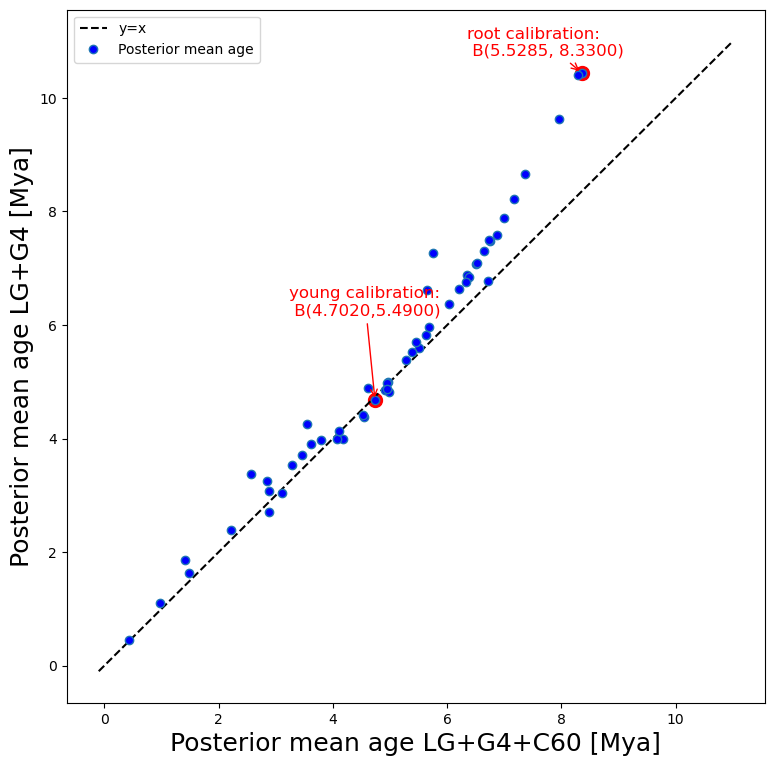

In [16]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,11], 
        [-0.1, 11], 
        'k--', label='y=x')
points = ax.plot(posterior_mean_iqtree,posterior_mean_baseml, 'o', label='Posterior mean age')

points[0].set_markerfacecolor('blue')
# points[23].set_markerfacecolor('blue')# Set default face color (for other points)

# Now plot the highlighted point with a different color
ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', s=100)
ax.scatter(posterior_mean_iqtree[-11], posterior_mean_baseml[-11], color='red', s=100)
# ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', label='Root age')
ax.annotate('root calibration:\n B(5.5285, 8.3300)', 
        xy=(posterior_mean_iqtree[0], posterior_mean_baseml[0]), 
        xytext=(posterior_mean_iqtree[0] -2,  posterior_mean_baseml[0] + 0.3),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
ax.annotate('young calibration:\n B(4.7020,5.4900)', 
        xy=(posterior_mean_iqtree[-11], posterior_mean_baseml[-11]), 
        xytext=(posterior_mean_iqtree[-11] -1.5,  posterior_mean_baseml[-11] + 1.5),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
 
 
# Labels and title
ax.set_ylabel('Posterior mean age LG+G4 [Mya]', fontsize=18)
ax.set_xlabel('Posterior mean age LG+G4+C60 [Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 [t97 ~ B(4.7020,5.4900)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_cherry_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')